In [1]:
#the dataset can be found from
#https://www.kaggle.com/datasets/nanditapore/credit-risk-analysis
#the dataset is about loan applicant data for credit risk analysis
#Column Descriptions:
#    ID: Unique identifier for each loan applicant.
#    Age: Age of the loan applicant.
#    Income: Income of the loan applicant.
#    Home: Home ownership status (Own, Mortgage, Rent).
#    Emp_Length: Employment length in years.
#    Intent: Purpose of the loan (e.g., education, home improvement).
#    Amount: Loan amount applied for.
#    Rate: Interest rate on the loan.
#    Status: Loan approval status (Fully Paid, Charged Off, Current).
#    Percent_Income: Loan amount as a percentage of income.
#    Default: Whether the applicant has defaulted on a loan previously (Yes, No).
#    Cred_Length: Length of the applicant's credit history.
#we will build the prediction models 


In [102]:
import pandas as pd

In [103]:
#load the dataset into dataframe df
df = pd.read_csv('data/credit_risk.csv')

In [104]:
#show content of dataframe
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [105]:
df.shape

(32581, 12)

In [106]:
#show the dataset per each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [107]:
#find how how many null value in the dataframe
df.isnull().sum(axis = 0)

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [108]:
#drop those row with null
df = df.dropna()

In [109]:
#confirm no more null
df.isnull().sum(axis = 0)

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [110]:
#Exploratory Data Analysis
#understand column Home
print('-------job--------')
print('HOME')
print(df['Home'].unique())  
print(df['Home'].value_counts())

-------job--------
HOME
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: Home, dtype: int64


In [111]:
df.describe()


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,28638.000000,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,16292.246456,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,9387.237677,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8159.500000,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16283.500000,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24434.750000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


[Text(0.5, 1.0, 'Age vs Default')]

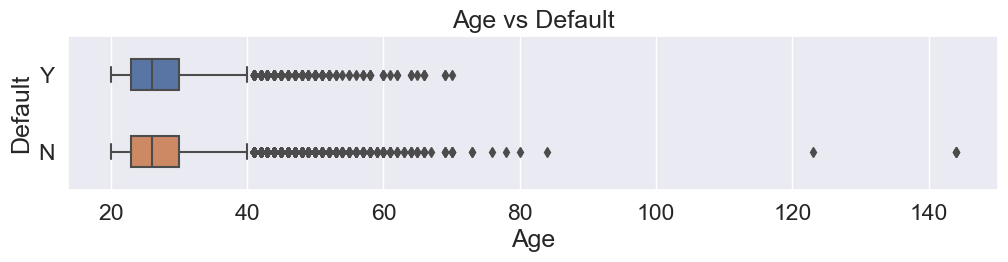

In [112]:
#use boxplot to show the distribution of feature Age and try to understand the correlation with Default
#Obversation : comparing the default case, there is no obvious difference in term of ages'
#25, 50, 75 percentile and outliners
import seaborn as sns
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Age", y='Default', width=0.4).set(title='Age vs Default')



[Text(0.5, 1.0, 'Income vs Default')]

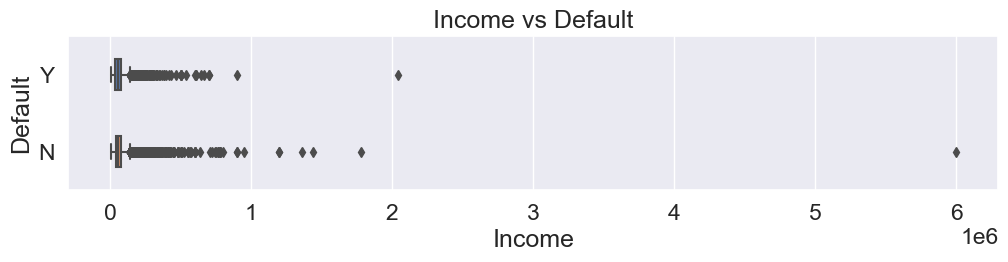

In [113]:
#use boxplot to show the distribution of feature Income and try to understand the correlation with Default
#Obversation : comparing the default case, there is no obvious difference in term of income's
#25, 50, 75 percentile and outliners
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Income", y='Default', width=0.4).set(title='Income vs Default')

[Text(0.5, 1.0, 'Emp_length vs Default')]

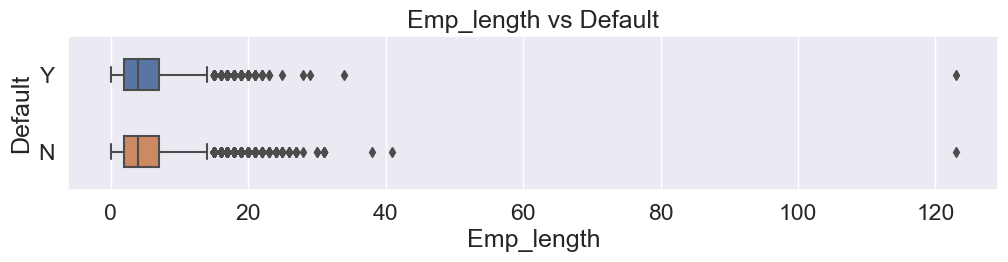

In [114]:
#use boxplot to show the distribution of feature Emp_length and try to understand the correlation with Default
#Obversation : comparing the default case, there is no obvious difference in term of Emp_length's
#25, 50, 75 percentile and outliners
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Emp_length", y='Default', width=0.4).set(title='Emp_length vs Default')

[Text(0.5, 1.0, 'Amount vs Default')]

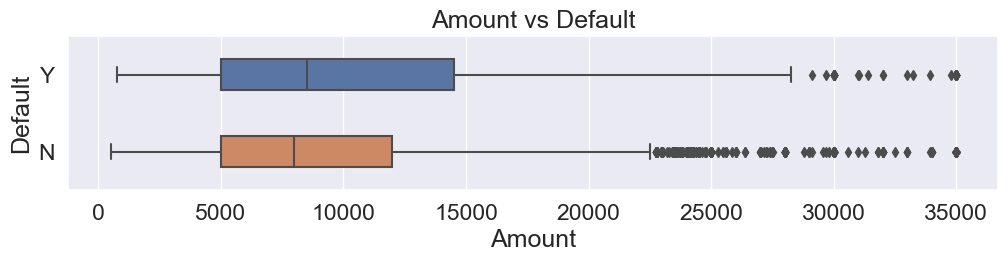

In [115]:
#use boxplot to show the distribution of feature Amount and try to understand the correlation with Default
#Obversation : comparing the default case, the 75 percentile contributes much more default case
#higher loan will like contribute to default case
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Amount", y='Default', width=0.4).set(title='Amount vs Default')

[Text(0.5, 1.0, 'Rate vs Default')]

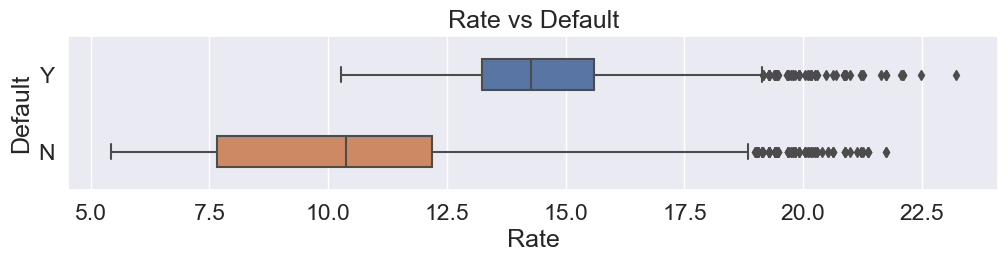

In [116]:
#use boxplot to show the distribution of feature Rate and try to understand the correlation with Default
##Obversation : comparing the default case, there is strong correlationship of loan rate, the higher the loan rate'
#the more likely the default case may happen
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Rate", y='Default', width=0.4).set(title='Rate vs Default')

[Text(0.5, 1.0, 'Percent_income vs Default')]

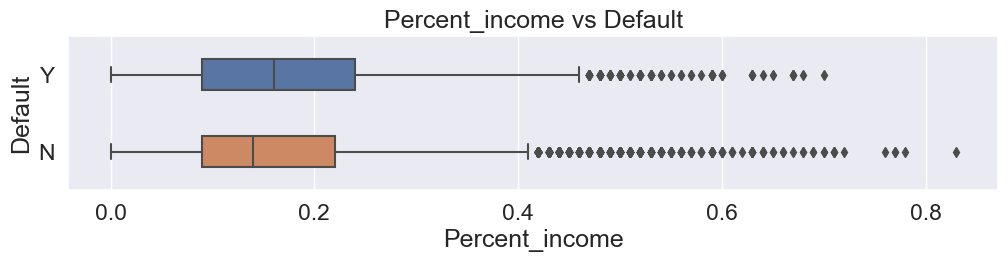

In [117]:
#use boxplot to show the distribution of feature Percent_income and try to understand the correlation with Default
#Obversation : comparing the default case, there is no obvious difference in term of Percent_income's
#25, 50, 75 percentile and outliners
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Percent_income", y='Default', width=0.4).set(title='Percent_income vs Default')

[Text(0.5, 1.0, 'Cred_length vs Default')]

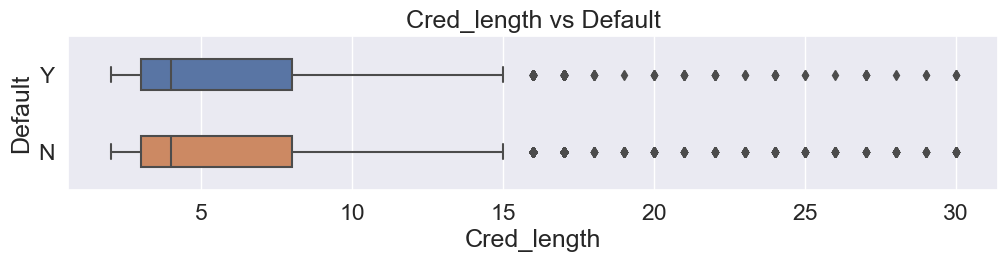

In [118]:
#use boxplot to show the distribution of feature Cred_length and try to understand the correlation with Default
#Obversation : comparing the default case, there is no obvious difference in term of Cred_length's
#25, 50, 75 percentile and outliners
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Cred_length", y='Default', width=0.4).set(title='Cred_length vs Default')

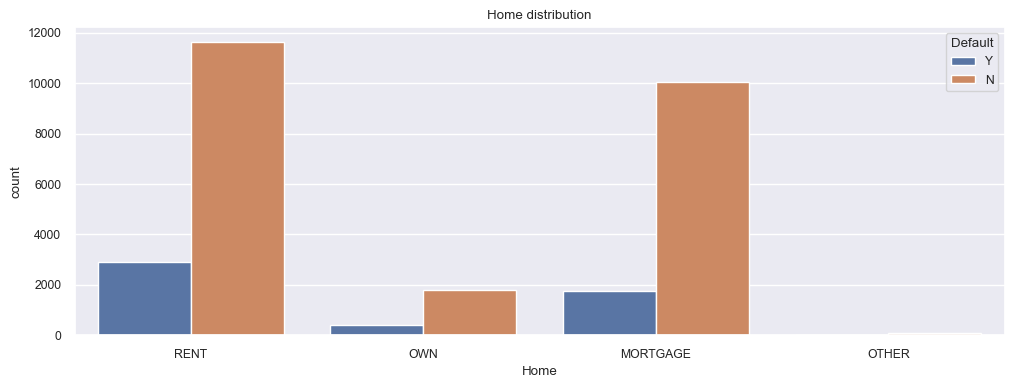

In [119]:
#use countplot to show the distribution of Home and the correlation with default
import seaborn as sns
import matplotlib.pyplot as plt
width = 12
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=0.8)
sns.countplot(x ='Home', hue = "Default", data = df).set(title='Home distribution')
plt.show()

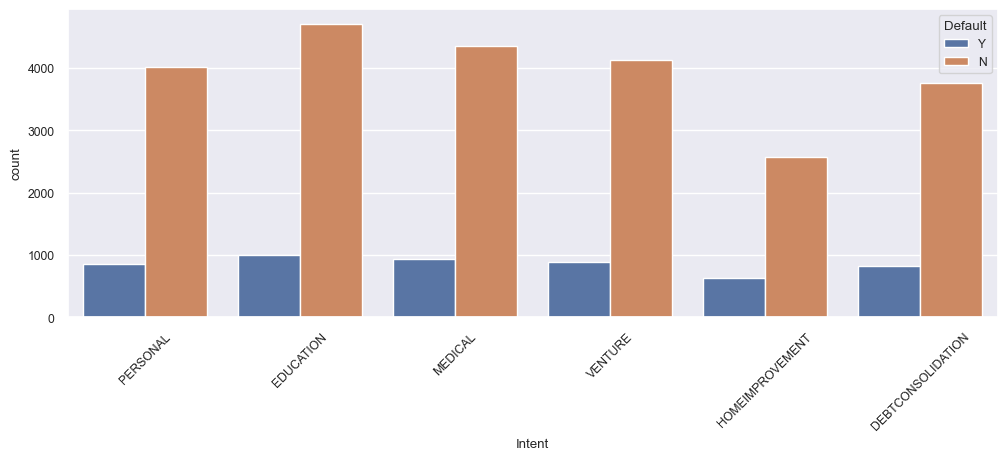

In [120]:
#use countplot to show the distribution of feature Intent and try to understand the correlation with Default
##Obversation : based on countplot, home improvement and debt consolidation have the highest default rate
import seaborn as sns
import matplotlib.pyplot as plt
width = 12
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=0.8)
chart = sns.countplot(x ='Intent', hue = "Default", data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x12d80082880>,
 [Text(-0.9320975748993772, 0.5841182336365646, 'N'),
  Text(0.9320975748993774, -0.5841182336365642, 'Y')],
 [Text(-0.5084168590360238, 0.31860994561994427, '82.2%\n23535'),
  Text(0.508416859036024, -0.3186099456199441, '17.8%\n5103')])

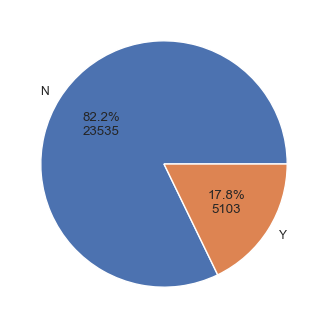

In [121]:
#use pie chart to understand the distribution of Default
import matplotlib.pyplot as plt
total = df['Default'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(df['Default'].value_counts().values, labels=df['Default'].value_counts().index, autopct=fmt)

In [122]:
df3 = df
df3.replace('Y', 1, inplace=True)
df3.replace('N', 0, inplace=True)


C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\2499593715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace('Y', 1, inplace=True)
C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\2499593715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace('N', 0, inplace=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Id'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Income'),
  Text(3.5, 0, 'Emp_length'),
  Text(4.5, 0, 'Amount'),
  Text(5.5, 0, 'Rate'),
  Text(6.5, 0, 'Status'),
  Text(7.5, 0, 'Percent_income'),
  Text(8.5, 0, 'Default'),
  Text(9.5, 0, 'Cred_length')])

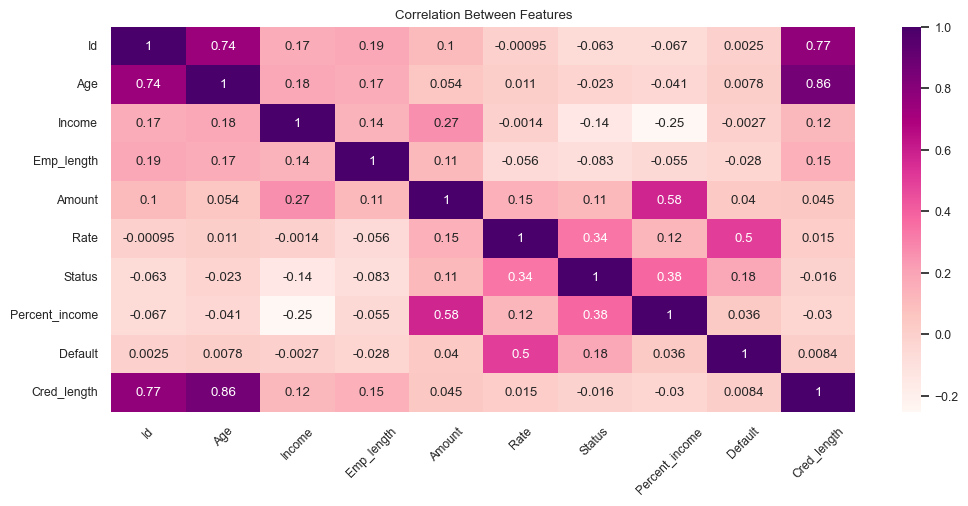

In [123]:
#We visualize the correlation between different features present in our data set.


import matplotlib.pyplot as plt
plt.subplots(figsize=(12,5))
correlation=df3.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation Between Features')
plt.xticks(rotation=45)

[Text(0.5, 1.0, 'Rate vs Default')]

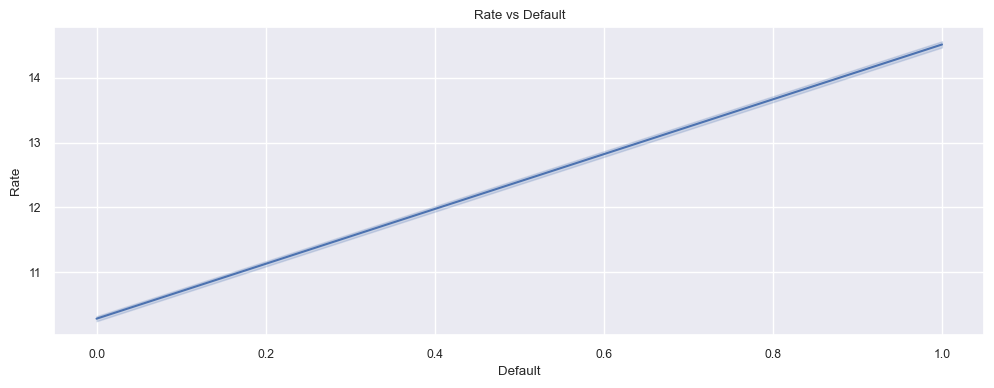

In [124]:
#from above heatmap, we find a correlation between Rate and Default Case (we only focus on correlation with Default)
#we use line chart to produce below plot, we can see a positive correlation
sns.lineplot(data=df, x="Default", y="Rate").set(title='Rate vs Default')

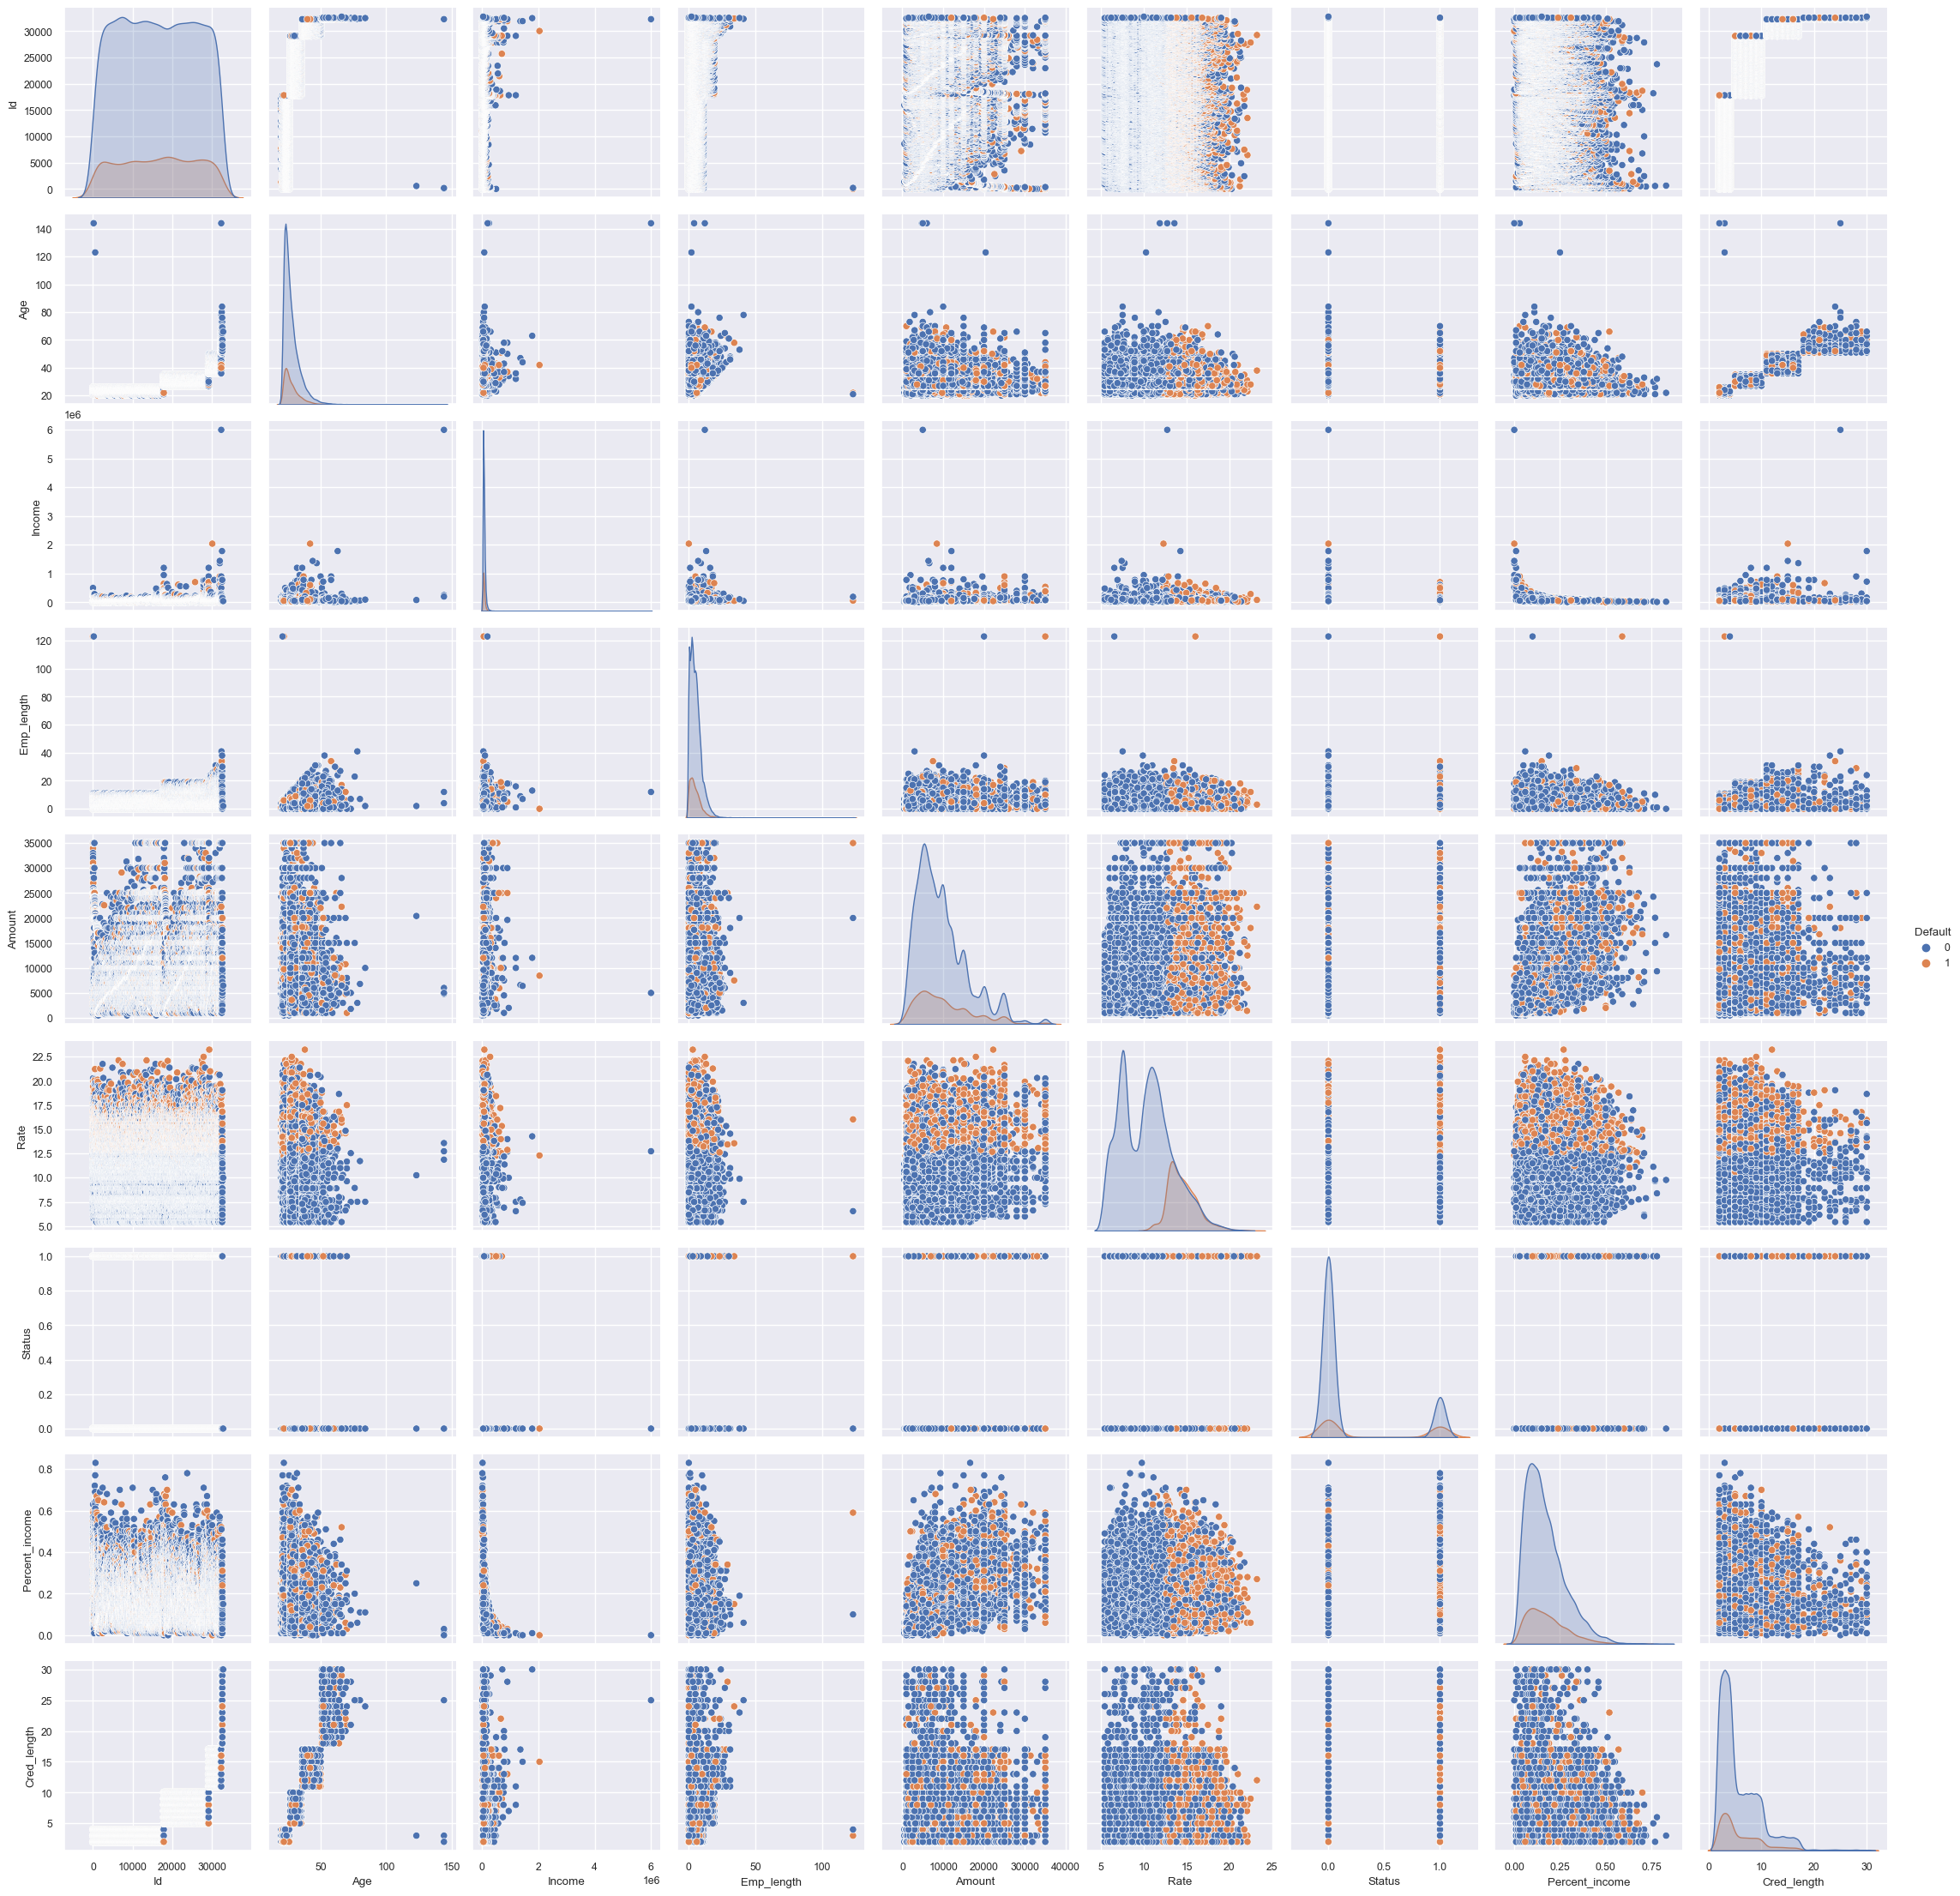

In [125]:
#we now use pairplot to understand the correlationship among features and default case.
#We can see from Rate row, almost all pairplots showing blue dot (default case Yes) on the top, this suggests
#rate feature has significant correlation with default case
sns.pairplot(data=df, hue="Default")

In [126]:
#understand Intent feature
print('-------location--------')
print('Intent')
print(df['Intent'].unique())  
print(df.Intent.value_counts())

-------location--------
Intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: Intent, dtype: int64


[Text(0.5, 1.0, 'scatterplot for loan amount, interest rate and default case')]

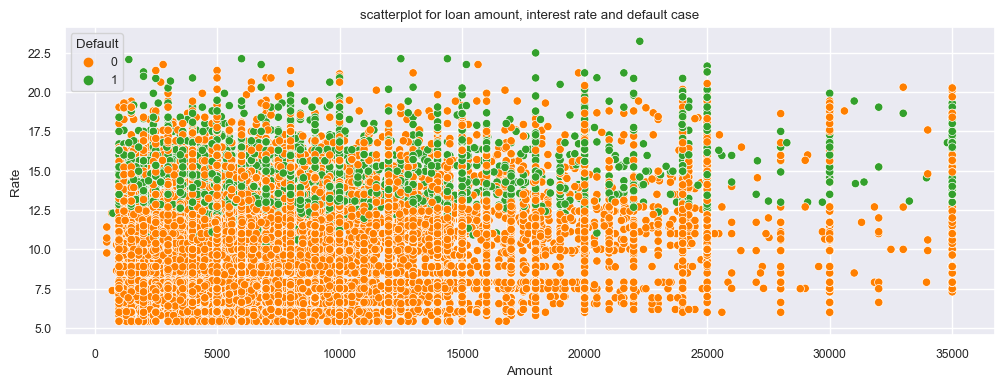

In [127]:
#use scatterplot to understand the distribution among loan amount, interest rate and default case
#we can see there is strong correlation between rate and default case. The pattern spreads across different loan amount.
sns.scatterplot(
    data=df, 
    x='Amount', 
    y='Rate', 
    hue='Default',

    palette='Paired_r'
    ).set(title = 'scatterplot for loan amount, interest rate and default case')


In [128]:
# we drop off ID
df2 = df
df2 = df2.drop('Id', axis=1)

In [129]:
df2.head(3)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,0,3


In [130]:
#prepare dataframe X and Y 

X1a = df2[['Age','Income','Home','Emp_length','Intent','Amount','Rate','Status','Percent_income','Cred_length']]
y1a = df2['Default']
X1a.columns

Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Cred_length'],
      dtype='object')

In [131]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train1a, X_test1a, y_train1a, y_test1a = '', '', '', ''
X_train1a, X_test1a, y_train1a, y_test1a = train_test_split(X1a, y1a, test_size=0.3, random_state=22)

In [132]:
#separate numeric and catagorical features
numeric_feats = ['Age', 'Income', 'Emp_length', 'Amount','Rate','Status','Percent_income','Cred_length']  # apply scaling
categorical_feats = ['Home','Intent']  # apply one-hot encoding

In [133]:
#[preparing the data]
#we call make_column_transfer 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
ct = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features 
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
    
)

In [134]:
ct


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Income', 'Emp_length', 'Amount',
                                  'Rate', 'Status', 'Percent_income',
                                  'Cred_length']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Home', 'Intent'])])

In [135]:
#transform numeric feature by scaling
train_transformed = ct.fit_transform(X_train1a)


In [136]:
train_transformed

array([[ 0.03761148, -0.13044788, -0.44073763, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19413209,  0.35318725, -1.18809643, ...,  0.        ,
         0.        ,  1.        ],
       [-0.58847095, -0.50828783,  0.80486036, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82021452,  0.30784646,  3.04693675, ...,  0.        ,
         0.        ,  1.        ],
       [-0.11890913, -0.45539023, -0.19161803, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43195034,  0.26250566, -0.19161803, ...,  0.        ,
         0.        ,  0.        ]])

In [137]:
#apply one hot encoder to categorical features
column_names = (
    numeric_feats 
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names

['Age',
 'Income',
 'Emp_length',
 'Amount',
 'Rate',
 'Status',
 'Percent_income',
 'Cred_length',
 'Home_MORTGAGE',
 'Home_OTHER',
 'Home_OWN',
 'Home_RENT',
 'Intent_DEBTCONSOLIDATION',
 'Intent_EDUCATION',
 'Intent_HOMEIMPROVEMENT',
 'Intent_MEDICAL',
 'Intent_PERSONAL',
 'Intent_VENTURE']

In [138]:
#the training dataset expanded to 18 columns
X_train1aT = pd.DataFrame(train_transformed, columns=column_names)
X_train1aT

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0.037611,-0.130448,-0.440738,0.444410,0.196410,-0.524509,0.472174,0.296059,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.194132,0.353187,-1.188096,2.170199,0.156177,-0.524509,0.848561,0.049362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.588471,-0.508288,0.804860,-0.514799,-0.335910,-0.524509,0.189883,-0.937429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.275430,0.549664,-0.191618,-1.049440,-0.988931,-0.524509,-1.315666,-0.444034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.663694,-0.175789,-1.188096,-0.263203,-0.332815,-0.524509,-0.186504,0.789455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20041,0.507173,0.084921,0.306621,2.410001,1.842889,1.906545,1.130852,-0.197336,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20042,0.037611,0.353187,-0.938977,0.082741,-0.673253,-0.524509,-0.562891,0.542757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20043,0.820215,0.307846,3.046937,-0.105956,2.121428,-0.524509,-0.656988,0.296059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20044,-0.118909,-0.455390,-0.191618,0.444410,-0.255443,1.906545,1.601336,0.542757,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
#show Y
y_train1a

25934    0
18270    0
7552     0
2927     0
23117    0
        ..
26172    1
24862    0
28321    1
25762    0
12660    0
Name: Default, Length: 20046, dtype: int64

In [140]:
#[preparing the test data]
#we call make_column_transfer 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
ct2 = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features 
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
    
)

In [141]:
#transform the test dataset
test_transformed = ct2.fit_transform(X_test1a)

In [142]:
test_transformed

array([[-0.75974466,  0.67382874,  0.48510634, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59640859, -1.02466804, -0.85877039, ...,  1.        ,
         0.        ,  0.        ],
       [-0.92308074, -0.12770906,  0.26112689, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.22027177, -0.33763563, -0.41081148, ...,  0.        ,
         1.        ,  0.        ],
       [-0.59640859,  0.68146244,  0.70908579, ...,  0.        ,
         1.        ,  0.        ],
       [-0.59640859, -0.7193203 , -0.85877039, ...,  0.        ,
         0.        ,  1.        ]])

In [143]:
#show test dataset
X_test1aT = pd.DataFrame(test_transformed, columns=column_names)
X_test1aT

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,-0.759745,0.673829,0.485106,0.061337,0.165337,-0.528880,-0.644226,-0.944161,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.596409,-1.024668,-0.858770,-1.344589,0.289425,-0.528880,-0.737982,-0.944161,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.923081,-0.127709,0.261127,-0.557749,-1.485023,-0.528880,-0.644226,-0.694339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.596409,-1.020851,-0.858770,-0.897249,-1.602906,1.890788,1.230902,-0.694339,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.546944,0.572930,-0.410811,-0.417956,-0.917324,-0.528880,-0.925495,0.055128,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.546944,0.519246,1.828983,2.298038,1.589238,1.890788,0.855876,0.055128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8588,3.323657,-0.165954,-0.634791,-0.417956,0.823000,-0.528880,-0.456713,1.554062,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8589,0.220272,-0.337636,-0.410811,-0.577720,0.940883,1.890788,-0.456713,0.055128,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8590,-0.596409,0.681462,0.709086,2.457802,-0.185209,-0.528880,0.668363,-0.694339,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [161]:
#use KNN for the model and train the model by test data , we set n_neighbors to 3
from sklearn.neighbors import KNeighborsClassifier
import time
t0 = time.time()
print("start time :" ,t0)
knn = KNeighborsClassifier(n_neighbors=6, weights='distance',metric='euclidean')
knn.fit(X_train1aT,y_train1a)
t1 = time.time()
print("end time:", t1)
ttime = t1-t0
print("Training time:", ttime)

#grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
#               'weights' : ['uniform','distance'],
#               'metric' : ['minkowski','euclidean','manhattan']}


start time : 1696232916.4271011
end time: 1696232916.4311068
Training time: 0.0040056705474853516


In [162]:
#[Modeling KNN]
## preform prediction by using KNN
y_pred1a = knn.predict(X_test1aT)
y_pred1a

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
#[Modeling KNN]
#we check the score of the prediction model of KNN
import sklearn.metrics as metrics
#knn.score(X_test1aT,y_pred1a)
score_knn= metrics.accuracy_score(y_test1a, y_pred1a)
print ('knn score :', score_knn)
row1 = {
    "Model": "KNN",
    "Score": score_knn,
    "Training Time":  ttime,
}
score_compare = pd.DataFrame()  
score_compare = score_compare.append(row1, ignore_index=True)


knn score : 0.8236731843575419


C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\5817171.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_compare = score_compare.append(row1, ignore_index=True)


In [50]:
score_compare

,Model,Score,Training Time
0,KNN,0.823673,0.0


In [51]:
#[Modeling Decision Tree Model]
#train the model using train data, then use the test data to make prediction by Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
t0 = time.time()
print("start time :" ,t0)
clf1b = DecisionTreeClassifier()
clf1b.fit(X_train1aT,y_train1a)
t1 = time.time()
print("end time:", t1)
ttime = t1-t0
print("Training time:", ttime)
y_pred1b = clf1b.predict(X_test1aT)

start time : 1696215930.5059574
end time: 1696215930.5830045
Training time: 0.07704710960388184


In [52]:
#get teh score of the model
import sklearn.metrics as metrics
score_decisiontree= metrics.accuracy_score(y_test1a, y_pred1b)
print ('decision tree score :', score_decisiontree)
row1 = {
    "Model": "Decision Tree",
    "Score": score_decisiontree,
    "Training Time":  ttime,
}
score_compare = score_compare.append(row1, ignore_index=True)

decision tree score : 0.7605912476722533


C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\1304370269.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_compare = score_compare.append(row1, ignore_index=True)


In [53]:
score_compare

,Model,Score,Training Time
0,KNN,0.823673,0.000000
1,Decision Tree,0.760591,0.077047


In [54]:
#[Modeling Logistic Regression]
#train the model using train data, then use the test data to make prediction by Logistic Regression
from sklearn.linear_model import LogisticRegression
t0 = time.time()
print("start time :" ,t0)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train1aT, y_train1a)
t1 = time.time()
print("end time:", t1)
ttime = t1-t0
print("Training time:", ttime)
y_pred1d = logisticRegr.predict(X_test1aT)
y_pred1d

start time : 1696215937.0192487
end time: 1696215937.1033378
Training time: 0.08408904075622559


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
#[Modeling logistic regression]
#check the score of the model of decision tree
score_logisticregression = metrics.accuracy_score(y_test1a, y_pred1d)
print ('logistic regression score :', score_logisticregression)
row1 = {
    "Model": "Logistic Regression",
    "Score": score_logisticregression,
    "Training Time":  ttime,
}

score_compare = score_compare.append(row1, ignore_index=True)

logistic regression score : 0.8254189944134078


C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\1193459442.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_compare = score_compare.append(row1, ignore_index=True)


In [56]:
logisticRegr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
score_compare

,Model,Score,Training Time
0,KNN,0.823673,0.000000
1,Decision Tree,0.760591,0.077047
2,Logistic Regression,0.825419,0.084089


In [58]:
#[SVM]
#check the score of the model of svm 
from sklearn import svm
import numpy as np
t0 = time.time()
print("start time :" ,t0)
clf1c = svm.SVC()
clf1c.fit(X_train1aT,y_train1a)
#clf1c = svm.SVC(kernel='linear').fit(X_train1aT, y_train1a)
t1 = time.time()
print("end time:", t1)
ttime = t1-t0
print("Training time:", ttime)
y_pred1c = clf1c.predict(X_test1aT)

start time : 1696215945.4203923
end time: 1696215956.39403
Training time: 10.973637819290161


In [59]:
#[Modeling SVM]
#check the score of the model of decision tree
score_svm = metrics.accuracy_score(y_test1a, y_pred1c)
print ('SVM score :', score_svm)
row1 = {
    "Model": "SVM",
    "Score": score_svm,
    "Training Time":  ttime,
}

score_compare = score_compare.append(row1, ignore_index=True)

SVM score : 0.8285614525139665


C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\1960241341.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_compare = score_compare.append(row1, ignore_index=True)


In [60]:
#get the parameters from the model
clf1c.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [61]:
score_compare

,Model,Score,Training Time
0,KNN,0.823673,0.000000
1,Decision Tree,0.760591,0.077047
2,Logistic Regression,0.825419,0.084089
3,SVM,0.828561,10.973638


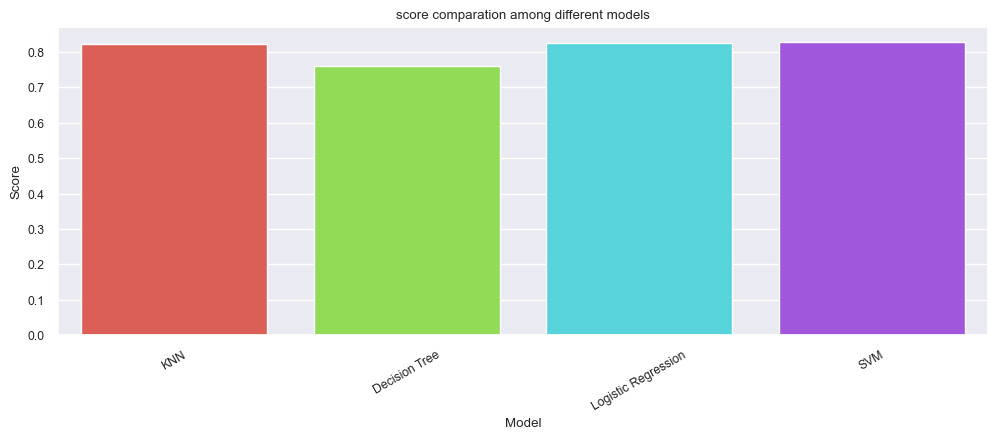

In [62]:
#plot models comparation
#observation : we got SVM with higher score among four different models as shown from below plot
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.barplot(x = score_compare['Model'], y = score_compare['Score'],  data = score_compare, 
            palette = 'hls',
            
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 0.4,  
            ci = 'sd'   
            ).set(title='score comparation among different models')

plt.xticks(rotation=30)
plt.show()

In [63]:
# we will use GridSearch to fine tune the hyperparameters of SVM model so that we can achieve further improvments
# C: regularization parameter. 
# C controls the trade off between smooth decision boundary and classifying training points correctly. 
# A larget value of c means we can get more training points correctly
# kernel : default is rbf, it can be linear, poly, rbf, sigmoid, precomputed
# gamma : scale , auto or float
# gamma defines how far the influence of a single training example reaches. If it has a low value
# it mans that every point has a far research and conversely high value of gamma means 
# that every pont has close reach. If gamma has a very high value, then the decision boundary is just
# going to be dependent upon the points that are very close to the line which effectly results in
# ignoring some the points that are very far from decision boundary.
# rerun the model using the parameters gotten from gridsearchcv
from sklearn import svm
# we are going to use RandomizedSearchCV to find the best parameters as well
from sklearn.model_selection import RandomizedSearchCV
param_grid2 = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid', 'linear']}
grid2 = RandomizedSearchCV(svm.SVC() ,param_grid2,refit=True,verbose=2, cv=10)
grid2.fit(X_train1aT,y_train1a)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.3s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   7.3s
[CV] END ...................C=0.1, gamma=0.01,

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'sigmoid', 'linear']},
                   verbose=2)

In [64]:
y_pred2b = grid2.predict(X_test1aT)
score_svm_randomsearchcv = metrics.accuracy_score(y_test1a, y_pred2b)

In [65]:
print(grid2.best_estimator_)

SVC(C=10, gamma=0.01)


In [66]:
#build svm model with fine tuned parameters
from sklearn import svm
import numpy as np
t0 = time.time()
print("start time :" ,t0)
clf3d = svm.SVC(C=1, gamma=1, kernel='rbf')
clf3d.fit(X_train1aT,y_train1a)
#clf1c = svm.SVC(kernel='linear').fit(X_train1aT, y_train1a)
t1 = time.time()
print("end time:", t1)
ttime = t1-t0
print("Training time:", ttime)
y_pred3d = clf3d.predict(X_test1aT)

start time : 1696219026.8222773
end time: 1696219067.0850244
Training time: 40.262747049331665


In [67]:
score_svm_tunned = metrics.accuracy_score(y_test1a, y_pred3d)
print(score_svm_tunned)

0.8233240223463687


In [68]:
#[Modeling SVM tuned parameters]
#check the score of the model of decision tree
row1 = {
    "Model": "SVM Tunned Parameters",
    "Score": score_svm_tunned,
    "Training Time":  ttime,
}
score_compare = score_compare.append(row1, ignore_index=True)

C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\783869028.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_compare = score_compare.append(row1, ignore_index=True)


In [69]:
score_compare

,Model,Score,Training Time
0,KNN,0.823673,0.000000
1,Decision Tree,0.760591,0.077047
2,Logistic Regression,0.825419,0.084089
3,SVM,0.828561,10.973638
4,SVM Tunned Parameters,0.823324,40.262747


In [70]:
#build logistic regression model with fine tuned parameters
from sklearn import svm
# we are going to use RandomizedSearchCV to find the best parameters as well
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model

C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
param_grid3 = dict(C=C, penalty=penalty, solver=solver)


logistic = linear_model.LogisticRegression()
grid3 = RandomizedSearchCV(logistic ,param_grid3,refit=True,verbose=2, cv=10)
grid3.fit(X_train1aT,y_train1a)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=59.94842503189409, penalty=l2, solver=liblinear; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=2.7825594022071245, penalty=l1, solver=saga; total time=   0.7s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1291.5496650148827, penalty=l1, solver=liblinear; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=166.81005372000593, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59.94842503189409, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=10000.0, penalty=l2, solver=saga; total time=   0.4s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=464.15888336127773, penalty=l1, solver=liblinear; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1291.5496650148827, penalty=l2, solver=saga; total time=   0.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=464.15888336127773, penalty=l1, solver=saga; total time=   0.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=2)

In [71]:
y_pred4b = grid3.predict(X_test1aT)
score_logistic_randomsearchcv = metrics.accuracy_score(y_test1a, y_pred4b)
print(score_logistic_randomsearchcv)

0.8255353817504656


In [72]:
#get the estimator
print(grid3.best_estimator_)

LogisticRegression(C=2.7825594022071245, penalty='l1', solver='saga')


In [73]:
#[Modeling Logistic Regression]
#train the model using train data, then use the test data to make prediction by Logistic Regression
from sklearn.linear_model import LogisticRegression
t0 = time.time()
print("start time :" ,t0)
logisticRegr = LogisticRegression(C=2.7825594022071245, penalty='l1', solver='saga')
logisticRegr.fit(X_train1aT, y_train1a)
t1 = time.time()
print("end time:", t1)
ttime = t1-t0
print("Training time:", ttime)
y_pred4e = logisticRegr.predict(X_test1aT)
y_pred4e

start time : 1696223306.2595718
end time: 1696223307.054462
Training time: 0.7948901653289795


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
#[Modeling logistic regression]
#check the score of the model of decision tree
score_logisticregression = metrics.accuracy_score(y_test1a, y_pred4e)
print ('logistic regression score :', score_logisticregression)
row1 = {
    "Model": "Logistic Regression Tunned Parameters",
    "Score": score_logisticregression,
    "Training Time":  ttime,
}
   
score_compare = score_compare.append(row1, ignore_index=True)

logistic regression score : 0.8255353817504656


C:\Users\glam.adm\AppData\Local\Temp\2\ipykernel_19224\3449344993.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_compare = score_compare.append(row1, ignore_index=True)


In [75]:
#show table details
score_compare

,Model,Score,Training Time
0,KNN,0.823673,0.000000
1,Decision Tree,0.760591,0.077047
2,Logistic Regression,0.825419,0.084089
3,SVM,0.828561,10.973638
4,SVM Tunned Parameters,0.823324,40.262747
5,Logistic Regression Tunned Parameters,0.825535,0.794890


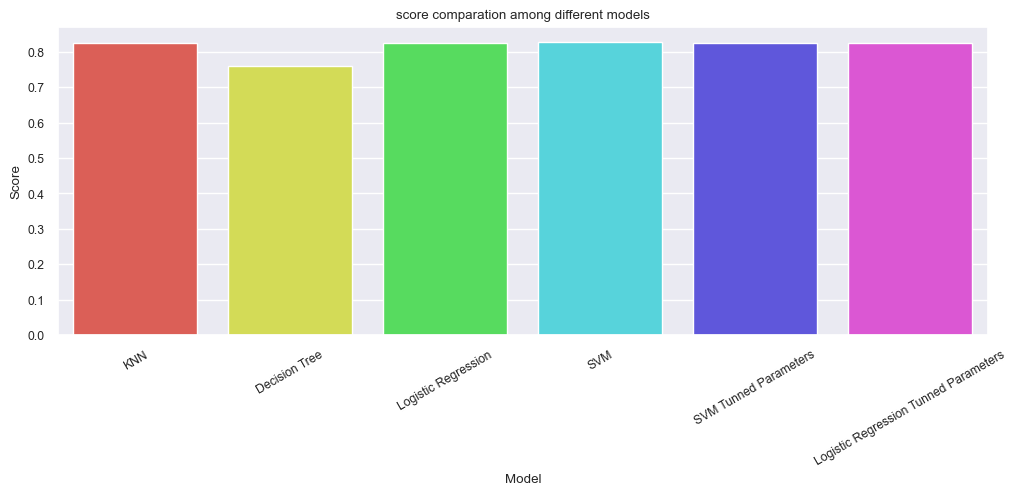

In [76]:
#plot models comparation
#observation : we got SVM with higher score among four different models as shown from below plot
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.barplot(x = score_compare['Model'], y = score_compare['Score'],  data = score_compare, 
            palette = 'hls',
            
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 0.4,  
            ci = 'sd'   
            ).set(title='score comparation among different models')

plt.xticks(rotation=30)
plt.show()

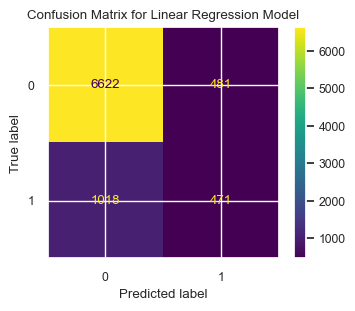

In [77]:
#predict confusion matrix
#we show the result by using confusion matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
from sklearn import metrics
cnf_matrix_svc3d = metrics.confusion_matrix(y_test1a, y_pred4e)
display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_svc3d, display_labels=logisticRegr.classes_)

ax.set(title='Confusion Matrix for Linear Regression Model')
display.plot(ax=ax);

In [164]:
#get confusion matrix details
TN, FP, FN, TP = metrics.confusion_matrix(y_test1a, y_pred4e).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

True Positive(TP)  =  471
False Positive(FP) =  481
True Negative(TN)  =  6622
False Negative(FN) =  1018


In [165]:
#get measuring matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Precision:",metrics.precision_score(y_test1a, y_pred1a))
print("Recall:",metrics.recall_score(y_test1a, y_pred1a))
print("Score:", metrics.accuracy_score(y_test1a, y_pred1a))
print("Accuracy:", accuracy_score(y_test1a, y_pred1a))
print("F1:", metrics.f1_score(y_test1a, y_pred1a))


Precision: 0.4763157894736842
Recall: 0.3646742780389523
Score: 0.8204143389199255
Accuracy: 0.8204143389199255
F1: 0.4130848231266641
